In [1]:
# go to upper directory
import sys
sys.path.append('../')

In [31]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

import models
import dataset
import config

In [8]:
vae = models.VAE()

In [16]:
dataloader = dataset.get_dataloader(batch_size=1, shuffle=False, num_workers=0)
spectrogram, caption = next(iter(dataloader))
spectrogram, caption = next(iter(dataloader))
spectrogram = spectrogram.to(config.DEVICE)

In [17]:
embeddings = vae.encode(spectrogram)
embeddings = embeddings.latent_dist.mode()

In [18]:
# check if there are nan values
print(torch.isnan(embeddings).any())

tensor(False, device='cuda:0')


In [24]:
first_layer = embeddings[0][0]

In [25]:
first_layer.shape

torch.Size([128, 107])

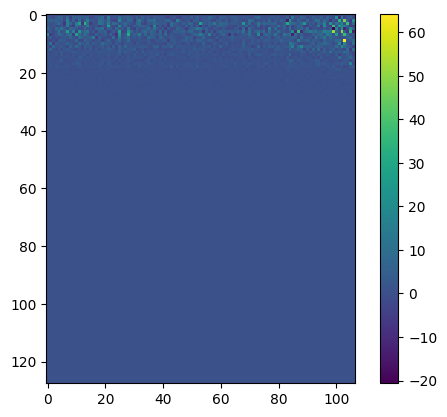

In [35]:
# show first layer in a 2D plot
# with information about the colors
plt.imshow(first_layer.detach().cpu().numpy(), cmap='viridis', interpolation='nearest')
plt.colorbar()

(-1.0, 1.0)

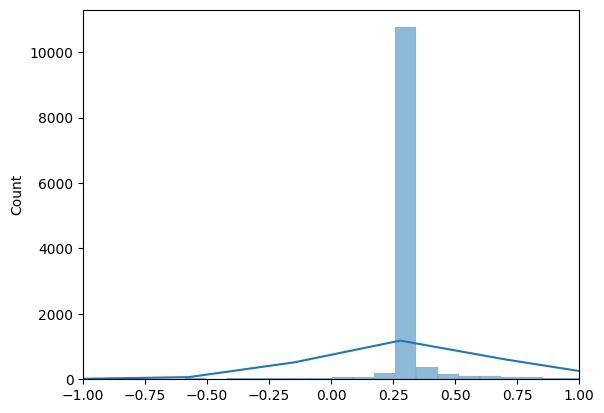

In [37]:
# show histogram of values in embeddings
# but only the values between -1 and 1
sns.histplot(first_layer.detach().cpu().numpy().flatten(), bins=1000, kde=True)
plt.xlim(-1, 1)
